In [20]:
import pandas as pd                           
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
a=pd.read_csv('C:/Users/admin/Music//Wholesale customers data.csv')
a.drop(['Region','Channel'],axis = 1,inplace = True)

In [19]:
a

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


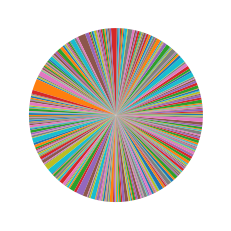

In [26]:
plt.pie(a['Fresh'])
plt.show()

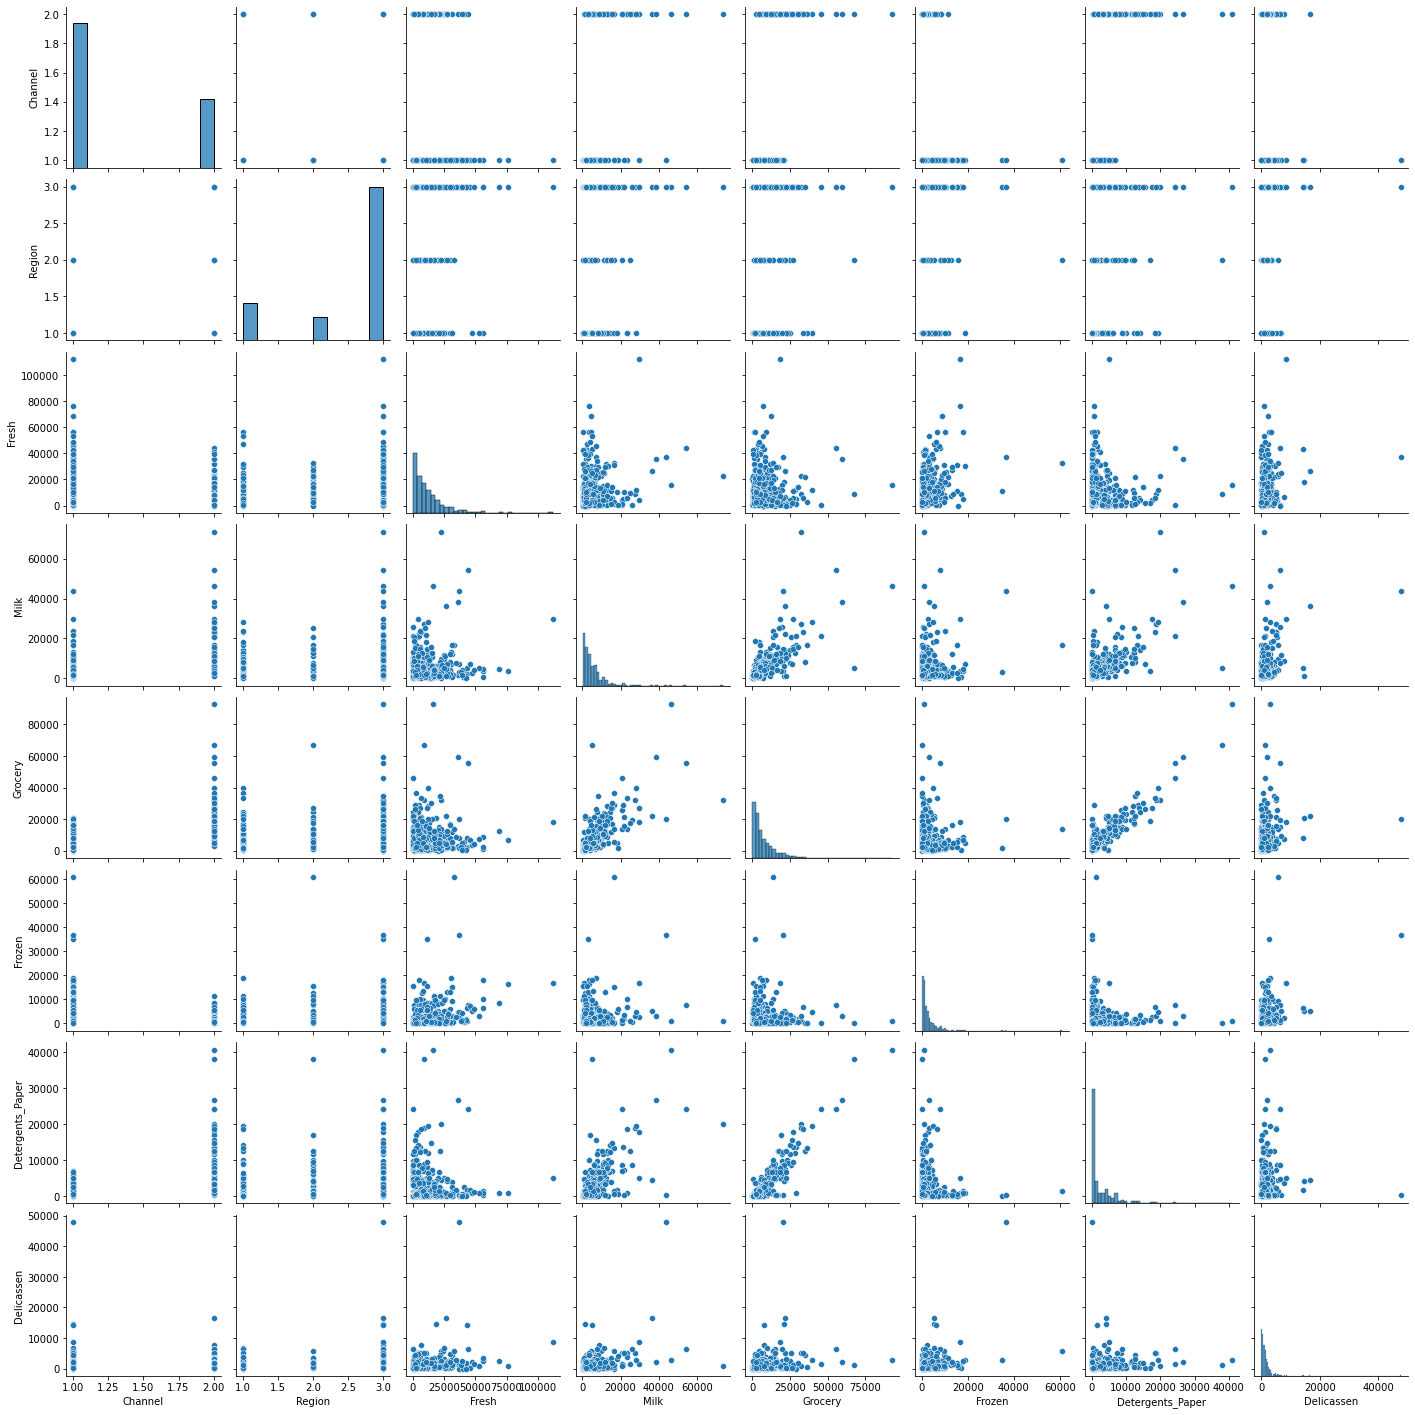

In [87]:
sns.pairplot(a)

<AxesSubplot:>

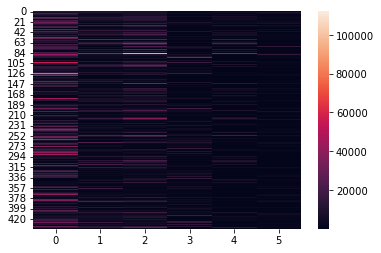

In [94]:
sns.heatmap(x)

In [70]:
x=a.iloc[:,2:8].values
x

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [71]:
from sklearn.preprocessing import StandardScaler
b= StandardScaler()
c=b.fit_transform(x)
c

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [72]:
from sklearn.cluster import KMeans
d=[]
for i in range (1,51):
    e= KMeans(n_clusters=i,init='k-means++')
    e.fit(x)
    d.append(e.inertia_)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


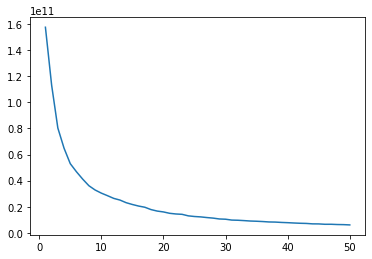

In [73]:
plt.plot(range(1,51),d)

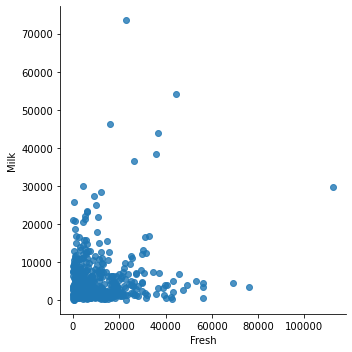

In [74]:
sns.lmplot(x='Fresh',y='Milk',data=a,fit_reg=False)

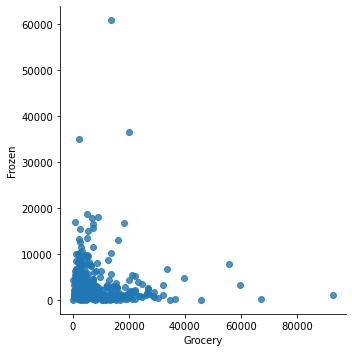

In [75]:
sns.lmplot(x='Grocery',y='Frozen',data=a,fit_reg=False)

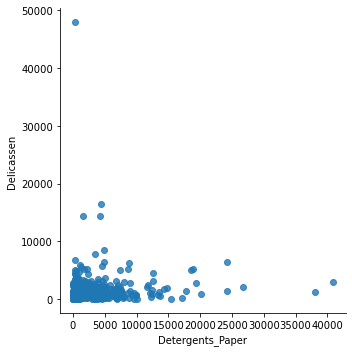

In [76]:
sns.lmplot(x='Detergents_Paper',y='Delicassen',data=a,fit_reg=False)

In [77]:
f=KMeans(n_clusters=17,init='k-means++')
k=f.fit(x)
k


    

KMeans(n_clusters=17)

In [78]:
y_predict=k.fit_predict(x)
y_predict

array([ 7,  9,  9, 10,  1,  0, 10,  9,  0,  2,  9, 10,  1,  7,  1,  0,  9,
        0,  7,  9, 10,  0,  1, 15,  7,  7,  0, 10, 15, 12,  7,  0, 10,  1,
        0,  9,  1,  7,  2,  3,  1, 10,  7,  2,  7, 15,  2,  6,  7, 15,  0,
        0, 12,  9,  1,  0, 15,  9, 10,  9,  0,  6,  9,  7,  0, 11,  9,  7,
        0,  0, 10,  7, 14,  1,  9, 10,  0,  2, 10,  0,  0,  9,  7, 10, 10,
       16,  4, 12, 14,  1, 10, 14, 11, 14,  9,  0,  9,  0,  0,  0,  7,  2,
        9,  3, 10, 10,  9,  7,  9,  2, 10,  7, 10, 10, 10, 10, 10,  0, 10,
        0, 10,  0, 10,  7, 12,  3, 10,  7,  9, 12,  0,  0, 10,  0,  0,  0,
        9,  9, 10,  0, 10,  1, 12, 14, 10, 11,  0,  0,  0,  1, 10,  0, 10,
        0,  0,  2,  9, 10,  9,  9,  9, 10, 10,  2,  9,  7,  9,  0,  0,  0,
        9, 15,  9,  2,  0,  9, 12, 10, 10,  0,  7,  8,  9,  5,  0,  0,  0,
        9,  9,  9, 10, 10,  0,  2,  0, 10,  1,  9, 10,  0,  2,  2,  1,  0,
        0,  2,  0,  9,  0,  2, 10, 11,  0,  9,  9,  9, 11, 10,  9,  0, 10,
        9,  0,  0,  0, 10

In [79]:
pd.concat([a,pd.DataFrame(y_predict)],axis=1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,0
0,2,3,12669,9656,7561,214,2674,1338,7
1,2,3,7057,9810,9568,1762,3293,1776,9
2,2,3,6353,8808,7684,2405,3516,7844,9
3,1,3,13265,1196,4221,6404,507,1788,10
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,12
437,2,3,14531,15488,30243,437,14841,1867,11
438,1,3,10290,1981,2232,1038,168,2125,0


In [80]:
from sklearn.metrics import silhouette_score
f=silhouette_score(x,y_predict)
f

0.30793081896800084

In [81]:
#hierarchical

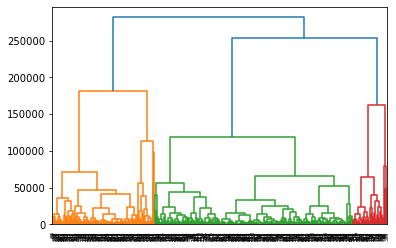

In [83]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))

In [84]:
from sklearn.cluster import AgglomerativeClustering
g=AgglomerativeClustering(n_clusters=17,affinity='euclidean',linkage='ward')

In [85]:
y_predicted=g.fit_predict(x)
y_predicted


array([ 2,  2,  2,  7,  4,  2,  7,  2, 10, 11,  2,  7,  4,  1,  4,  7,  2,
       10,  1,  2,  1, 10,  1, 12,  4,  1,  7,  1,  5,  3,  1, 10,  1,  4,
       10,  2,  4,  2, 11,  3,  1,  1,  2, 11,  2,  5, 11,  0,  2,  5, 10,
       10,  3,  2,  4, 10,  5,  2,  1,  2,  2,  0,  2,  2, 10,  5, 10,  1,
       10,  7,  1,  1, 10,  1,  2,  1, 10,  5,  7, 10, 10,  2,  2,  1,  7,
       16,  0,  3,  8,  4,  7,  7,  5,  8,  2, 10, 10, 10, 10,  7,  2,  2,
        2,  3,  1,  1,  2,  2, 10,  5,  7,  2,  1,  1,  1,  7,  7, 10,  1,
        7,  1, 10,  1,  2,  3,  6,  1,  1, 10,  3,  7, 10,  1,  7, 10, 10,
        2, 10,  7, 10,  1,  4,  4,  7,  1,  5, 10,  7, 10,  4,  1, 10,  1,
       10, 10, 11,  2,  1,  2,  2,  2,  1,  1,  5,  2,  2,  2, 10, 10, 10,
        2,  5, 10, 11, 10,  2,  3,  2,  2, 10,  1, 15,  2, 13, 10,  7, 10,
        2,  2,  2,  1,  1, 10, 11, 10,  1,  4,  2,  7,  7, 11,  5,  4, 10,
       10, 11, 10, 10, 10, 11,  1,  5, 10,  2,  2,  2,  5,  1,  2, 10,  1,
        2,  7, 10, 10,  7

In [86]:
from sklearn.metrics import silhouette_score
h=silhouette_score(x,y_predicted)
h

0.22302465094185733